In [ ]:
import pickle
from openai import OpenAI
from multiprocessing import Pool

In [ ]:
with open('../llm_gen/res_all_in_one_dict_20250311160543.pkl', 'rb') as f:
    gmb_result_dict = pickle.load(f)

for key, res in gmb_result_dict.items():
    print(res[2])
    print(res[0])
    if res[1] == []:
        print('Fail to solve!!!')
    elif res[1][0] is None:
        print('GMBL grammar error!!!')
    else:
        res[1][0].plot()
        print(res[1][0])
    # print(res[3])
    # print(res[4])
    
    print('')
    

In [41]:
with open('../llm_gen/res_all_in_one_dict_20250311160543.pkl', 'rb') as f:
    gmb_result_dict = pickle.load(f)

gmbl_code_list = []
caption_list = []
diagram_list = []
for key, res in gmb_result_dict.items():
    if res[1] != [] and res[1][0] is not None:
        gmbl_code = res[0][:-1]
        gmbl_code = ' \n'.join(gmbl_code)

        caption_list += [res[2]]
        diagram_list += [res[1][0]]
        gmbl_code_list += [gmbl_code]


diagram_list[0]

Diagram(named_points={<primitives.Point object at 0x000001C8B87C2280>: TfPoint(x=-0.8075240269017016, y=0.6029463575948067), <primitives.Point object at 0x000001C8B83E2D60>: TfPoint(x=0.73019205692321, y=0.4092373653147093), <primitives.Point object at 0x000001C8C44CD970>: TfPoint(x=-0.03866598498924578, y=0.506091861454758), <primitives.Point object at 0x000001C8C44CD9D0>: TfPoint(x=-0.10449246093632897, y=-0.2660417779499673), <primitives.Point object at 0x000001C8C44CD6A0>: TfPoint(x=0.4111353723111255, y=-0.12494080093819769), <primitives.Point object at 0x000001C8C44CD070>: TfPoint(x=0.1436554036700772, y=-0.5727670526645297)}, named_lines={}, named_circles={<primitives.Circle object at 0x000001C8C44CDEE0>: CircleNF(center=TfPoint(x=-0.03866598498924578, y=0.506091861454758), radius=0.7749345017716003)}, segments=[(TfPoint(x=-0.8075240269017016, y=0.6029463575948067), TfPoint(x=0.73019205692321, y=0.4092373653147093)), (TfPoint(x=-0.8075240269017016, y=0.6029463575948067), TfPoint

In [61]:
messages_list = [
    [[{
    "role": "user", 
    "content": 'aaa' + '\n\n' + 'bbb' + item[2] + 'ccc'
    }], item[0], item[1], item[2]]
    for item in zip(caption_list, diagram_list, gmbl_code_list)]

In [66]:
aaa = messages_list[0]
aaa[0]

[{'role': 'user',
  'content': 'aaa\n\nbbb(param B point) \n(param C point) \n(define O point (midp B C)) \n(define Gamma circle (diam B C)) \n(param D point (on-minor-arc Gamma B C)) \n(param E point (on-minor-arc Gamma C B)) \n(define A point (inter-ll (line B D) (line C E))) \n(assert (= (uangle B A C) (div (mul 7 pi) 18))) \nccc'}]

In [ ]:
filename = '..\grammar_example.txt'
with open(filename, 'r', encoding='utf-8') as file:
    grammer_example = [line for line in file]
grammer_example = ''.join(grammer_example)

quest1 = '根据文档中的GMBL的语法和示例，描述如下GMBL代码的对应的图像，并生成一道几何题的问答。'
quest2 = '输出格式为"几何问题：xxx \n\n 问题答案：xxx"。'

messages_list = [
    [[{
    "role": "user", 
    "content": grammer_example + '\n\n' + quest1 + gmbl_code + quest2
    }], gmbl_code]
    for gmbl_code in gmbl_code_list]

print(len(messages_list))
print(messages_list[0][0])

In [ ]:
def llm_generate(messages):
    messages, input_caption = messages
    client = OpenAI(
        api_key = "c8a7e43e-cce1-4d61-af75-de350b7e5731",
        base_url = "https://ark.cn-beijing.volces.com/api/v3",
    )

    print("----- standard request -----")
    # print(messages[0]['content'])
    print(input_caption)

    completion = client.chat.completions.create(
        model = "deepseek-r1-250120", 
        messages = messages,
    )

    # print("----- Reasoning content -----")
    # print(completion.choices[0].message.reasoning_content)

    # print("----- Content -----")
    # print(completion.choices[0].message.content)

    return([messages, completion, input_caption])

In [ ]:
client = OpenAI(
    api_key = "c8a7e43e-cce1-4d61-af75-de350b7e5731",
    base_url = "https://ark.cn-beijing.volces.com/api/v3",
)

response = client.chat.completions.create(
    # 替换 <Model> 为模型的Model ID
    model="deepseek-r1-250120",
    messages=messages_list[1][0],
    stream=True,
)
reasoning_content = ""
content = ""

for chunk in response:
    if hasattr(chunk.choices[0].delta, 'reasoning_content') and chunk.choices[0].delta.reasoning_content:
        reasoning_content += chunk.choices[0].delta.reasoning_content
        print(chunk.choices[0].delta.reasoning_content, end="")
    else:
        content += chunk.choices[0].delta.content
        print(chunk.choices[0].delta.content, end="")

In [1]:
import pickle
import matplotlib as plt
import json
import tqdm

from PIL import Image

with open('../llm_gen/qa_dict_20250314160130.pkl', 'rb') as f:
    llm_result_dict = pickle.load(f)

 83%|████████▎ | 20/24 [00:03<00:00,  5.70it/s]d:\projects\geo-model-builder\src\diagram.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
 92%|█████████▏| 22/24 [00:03<00:00,  6.16it/s]d:\projects\geo-model-builder\src\diagram.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
 96%|█████████▌| 23/24 [00:03<00:00,  6.31it/s]d:\projects\geo-model-builder\src\diagram.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.

120
{'image': 'fig_0.png', 'height': 480, 'width': 640, 'conversations': [{'from': 'human', 'value': '<image>\n以线段BC为直径作圆Gamma，O为BC的中点。D和E分别位于圆Gamma的劣弧BC和CB上，直线BD与CE交于点A，且角BAC为70度。点O是线段BC的____。'}, {'from': 'gpt', 'value': '中点'}], 'input_caption': '\n### 问题文本中的信息1. 图形中bc为半圆的直径。2. D和E是bc上的两个点。3. 连接bd和ce，并延伸交于点a。4. 连接od和oe。5. ∠a的度数为70°。### 图片中的信息1. 半圆的直径bc，直线bc被两点o分成bo和oc两段，o为中央点。2. 点d和点e位于半圆直径的两侧。3. 点a位于半圆外，bd与ce交于点a。4. 点d和点o相连成od。5. 点e和点o相连成oe。6. ∠a标注为70°。7. 通过图形的几何对称性和已知直径的性质，bd和ce将构成一些补角和对角关系，待进一步证明。\n', 'gmbl_code': '(param B point) \n(param C point) \n(define O point (midp B C)) \n(define Gamma circle (diam B C)) \n(param D point (on-minor-arc Gamma B C)) \n(param E point (on-minor-arc Gamma C B)) \n(define A point (inter-ll (line B D) (line C E))) \n(assert (= (uangle B A C) (div (mul 7 pi) 18))) \n', 'gmbl_caption': '以线段BC为直径作圆Gamma，O为BC的中点。D和E分别位于圆Gamma的劣弧BC和CB上，直线BD与CE交于点A，且角BAC为70度。'}


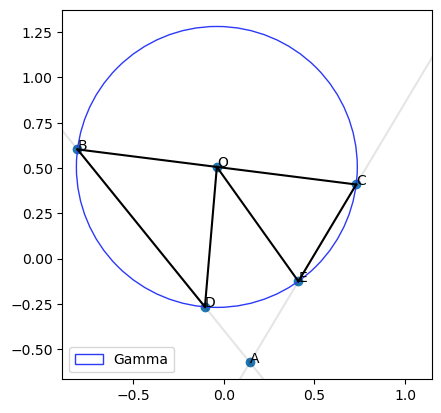

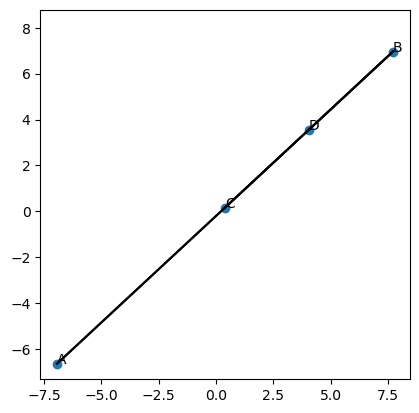

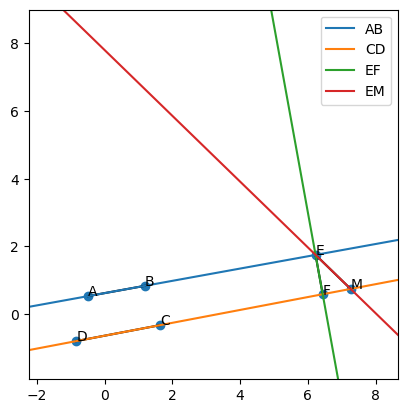

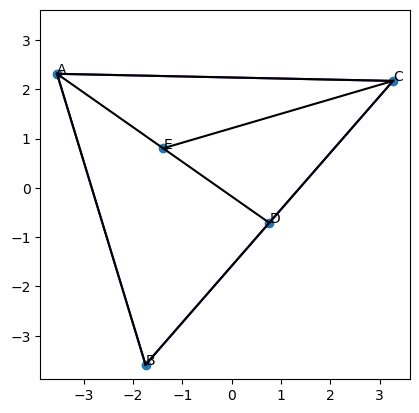

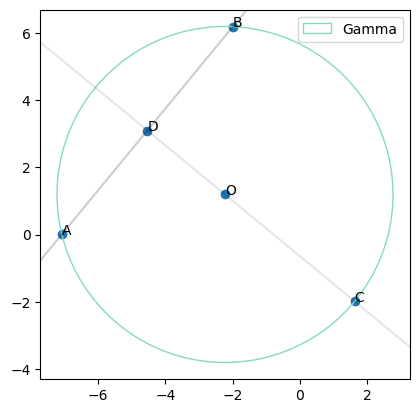

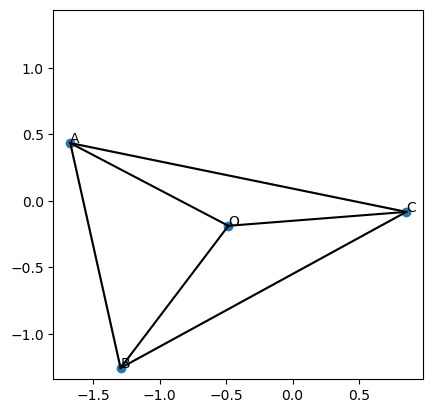

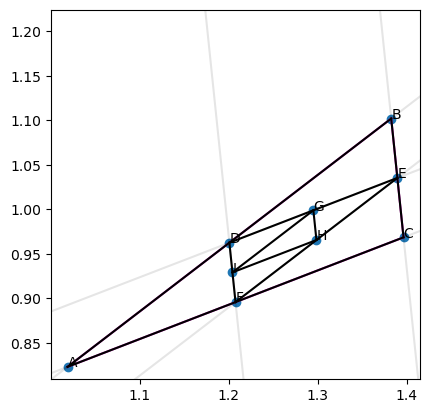

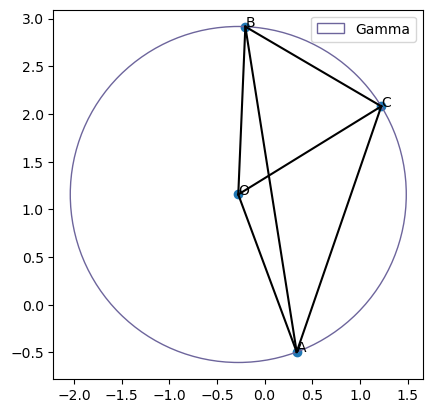

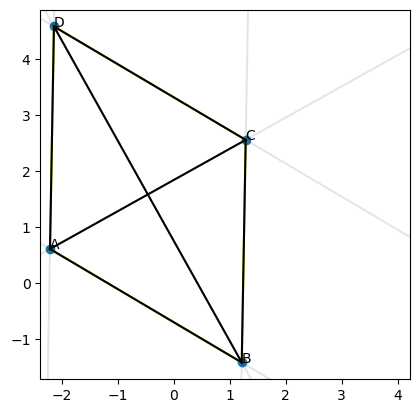

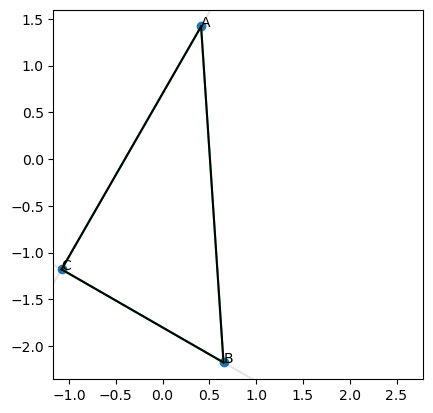

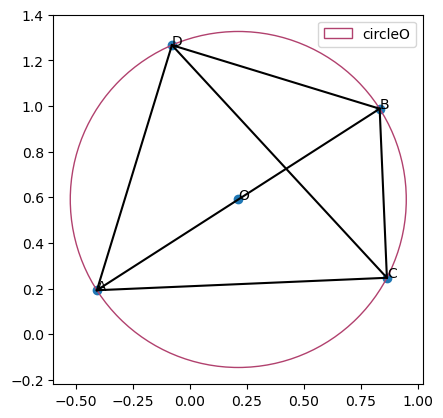

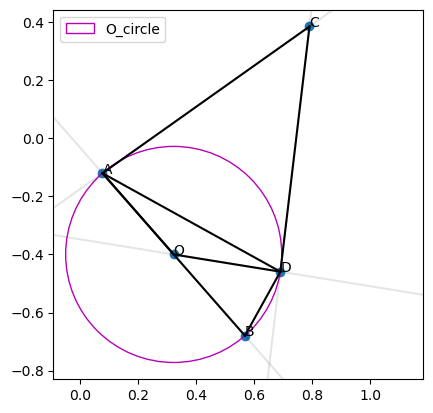

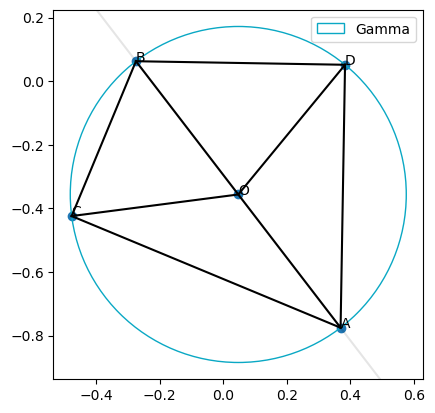

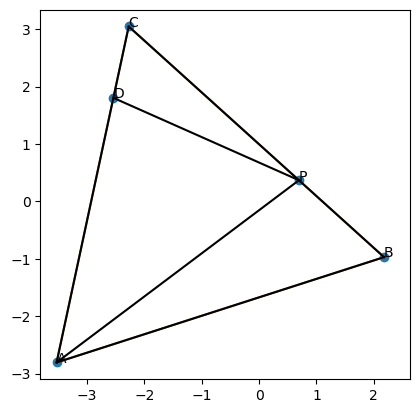

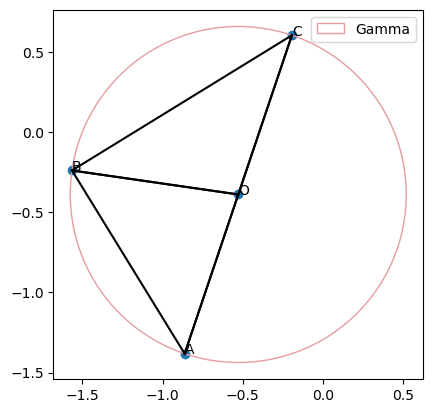

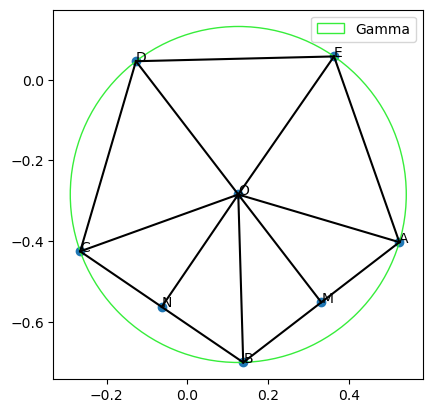

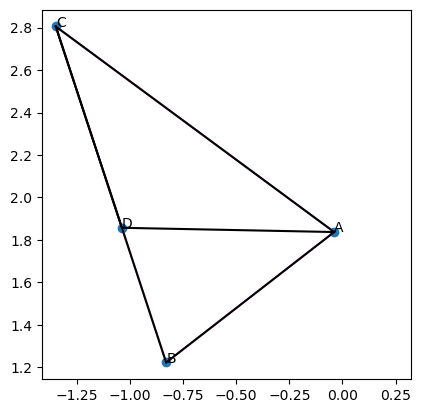

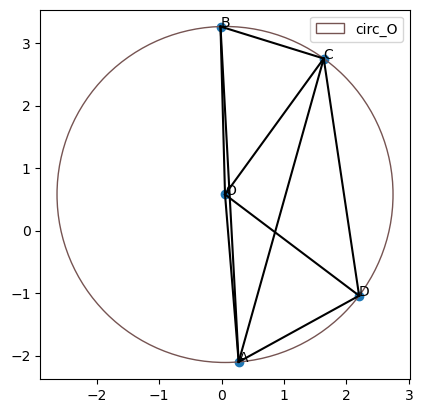

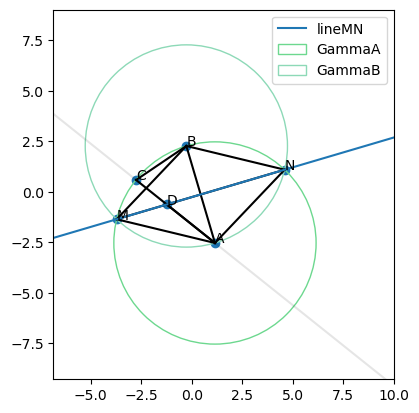

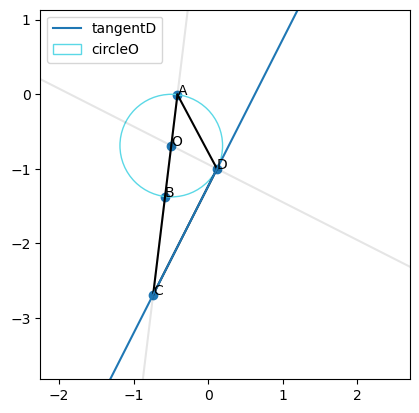

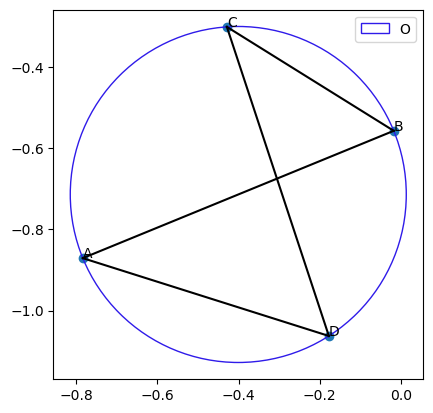

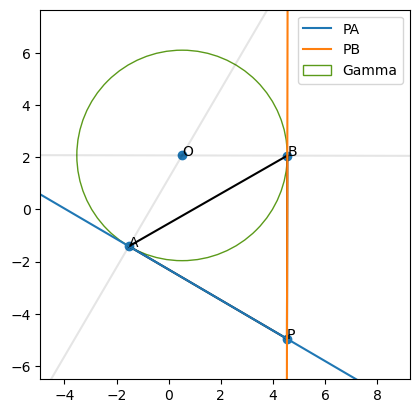

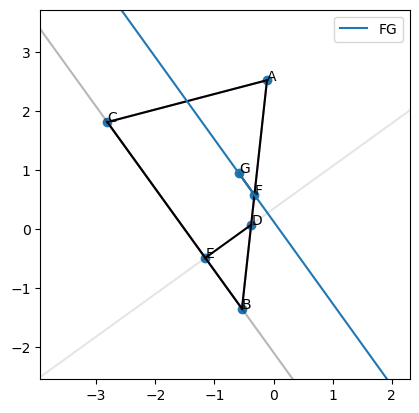

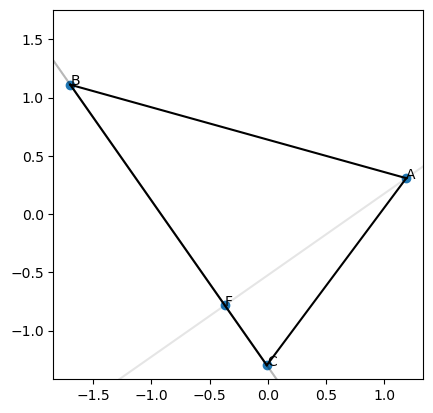

In [5]:
data_list = []
cnt = 0
for res in tqdm.tqdm(llm_result_dict.items()):
    content, reasoning_content = res[1][1].choices[0].message.content, res[1][1].choices[0].message.reasoning_content
    input_caption, diagram, gmbl_code = res[1][2:5]
    fname = 'fig_' + str(cnt) + '.png'
    diagram = diagram.plot(show=False, save=True, fname='../llm_gen/images/' + fname)
    
    im = Image.open('../llm_gen/images/' + fname)
    width, height = im.size

    gmbl_caption = None
    question = None
    answer = None
    # print(content)
    lines = content.splitlines()
    for line in lines:
        line = line.strip()
        if line.startswith('图像描述'):
            gmbl_caption = line[5:]
        elif line.startswith('几何问题'):
            question = line[6:]
        elif line.startswith('问题答案'):
            answer = line[6:]
            entry = {'image': fname, 'height': height, 'width': width, 
                     'conversations': [{'from': 'human', 'value': "<image>\n" + gmbl_caption + question},
                                       {'from': 'gpt', 'value': answer}],
                     'input_caption': input_caption, 'gmbl_code': gmbl_code, 'gmbl_caption': gmbl_caption}
            data_list.append(entry)
            # cnt += 1
            # print(cnt)
    
    cnt += 1

print(len(data_list))
print(data_list[0])

In [6]:
data_list

[{'image': 'fig_0.png',
  'height': 480,
  'width': 640,
  'conversations': [{'from': 'human',
    'value': '<image>\n以线段BC为直径作圆Gamma，O为BC的中点。D和E分别位于圆Gamma的劣弧BC和CB上，直线BD与CE交于点A，且角BAC为70度。点O是线段BC的____。'},
   {'from': 'gpt', 'value': '中点'}],
  'input_caption': '\n### 问题文本中的信息1. 图形中bc为半圆的直径。2. D和E是bc上的两个点。3. 连接bd和ce，并延伸交于点a。4. 连接od和oe。5. ∠a的度数为70°。### 图片中的信息1. 半圆的直径bc，直线bc被两点o分成bo和oc两段，o为中央点。2. 点d和点e位于半圆直径的两侧。3. 点a位于半圆外，bd与ce交于点a。4. 点d和点o相连成od。5. 点e和点o相连成oe。6. ∠a标注为70°。7. 通过图形的几何对称性和已知直径的性质，bd和ce将构成一些补角和对角关系，待进一步证明。\n',
  'gmbl_code': '(param B point) \n(param C point) \n(define O point (midp B C)) \n(define Gamma circle (diam B C)) \n(param D point (on-minor-arc Gamma B C)) \n(param E point (on-minor-arc Gamma C B)) \n(define A point (inter-ll (line B D) (line C E))) \n(assert (= (uangle B A C) (div (mul 7 pi) 18))) \n',
  'gmbl_caption': '以线段BC为直径作圆Gamma，O为BC的中点。D和E分别位于圆Gamma的劣弧BC和CB上，直线BD与CE交于点A，且角BAC为70度。'},
 {'image': 'fig_0.png',
  'height': 480,
  'width': 640,
  'conversations': [

In [7]:
import pandas as pd
import datetime

time_str = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
data_list = pd.DataFrame(data_list)
data_list.to_json(f'D:/projects/geo-model-builder/llm_gen/metadata_{time_str}.jsonl', orient='records', lines=True, force_ascii=False)

In [ ]:
# json_object = json.dumps(data_list, indent=4)
# with open("../llm_gen/metadata.jsonl", "w") as outfile:
#     outfile.write(json_object)

In [ ]:
# import json

# with open("../llm_gen/metadata_0328.jsonl", "r") as f:
#     json_object = json.load(f)

# json_object[0]

{'image': 'images/fig_0.png',
 'height': 480,
 'width': 640,
 'conversations': [{'from': 'human', 'value': '<image>\n点O是线段BC的____。'},
  {'from': 'gpt', 'value': '中点'}],
 'input_caption': '\n### 问题文本中的信息1. 图形中bc为半圆的直径。2. D和E是bc上的两个点。3. 连接bd和ce，并延伸交于点a。4. 连接od和oe。5. ∠a的度数为70°。### 图片中的信息1. 半圆的直径bc，直线bc被两点o分成bo和oc两段，o为中央点。2. 点d和点e位于半圆直径的两侧。3. 点a位于半圆外，bd与ce交于点a。4. 点d和点o相连成od。5. 点e和点o相连成oe。6. ∠a标注为70°。7. 通过图形的几何对称性和已知直径的性质，bd和ce将构成一些补角和对角关系，待进一步证明。\n',
 'gmbl_code': '(param B point) \n(param C point) \n(define O point (midp B C)) \n(define Gamma circle (diam B C)) \n(param D point (on-minor-arc Gamma B C)) \n(param E point (on-minor-arc Gamma C B)) \n(define A point (inter-ll (line B D) (line C E))) \n(assert (= (uangle B A C) (div (mul 7 pi) 18))) \n',
 'gmbl_caption': '以线段BC为直径作圆Gamma，O为BC的中点。D和E分别位于圆Gamma的劣弧BC和CB上，直线BD与CE交于点A，且角BAC为70度。'}